In [18]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
import pandas as pd
import networkx as nx
import pylab as plt

In [10]:
data = pd.read_csv("../../Downloads/7th data.csv", names=list(pd.read_csv("../../Downloads/7th attribute names.csv").columns))
data.head(9)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2


In [12]:
attributes = list(data.columns)
attributes

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'heartdisease']

In [21]:
dagEdges = [('age', 'trestbps'), ('age', 'fbs'), ('sex', 'trestbps'), ('sex', 'trestbps'),('exang', 'trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),
('heartdisease','restecg'),('heartdisease','thal'),('heartdisease','chol')]
Bmodel = BayesianModel(dagEdges)

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


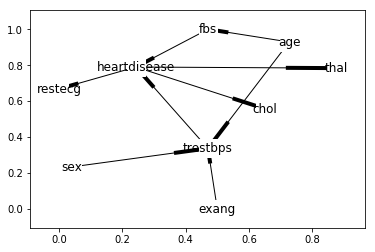

In [43]:
G = nx.DiGraph()
G.add_edges_from(dagEdges)
nx.draw_networkx(G, node_color='w', node_shape='s')

In [24]:
Bmodel.fit(data)

In [25]:
Bmodel.local_independencies('age')

(age _|_ sex, exang)

In [26]:
Bmodel.local_independencies('thal')

(thal _|_ chol, age, sex, exang, trestbps, restecg, fbs | heartdisease)

In [27]:
Bmodel.get_independencies()

(age _|_ sex, exang)
(age _|_ thal, restecg, chol | heartdisease)
(age _|_ exang | sex)
(age _|_ sex | exang)
(age _|_ sex, exang | fbs)
(age _|_ restecg, thal | heartdisease, chol)
(age _|_ restecg, thal, chol | heartdisease, sex)
(age _|_ restecg, thal, chol | heartdisease, exang)
(age _|_ restecg, chol | heartdisease, thal)
(age _|_ restecg, thal, chol | heartdisease, trestbps)
(age _|_ thal, chol | heartdisease, restecg)
(age _|_ thal, restecg, chol | heartdisease, fbs)
(age _|_ exang | sex, fbs)
(age _|_ sex | fbs, exang)
(age _|_ heartdisease, thal, restecg, chol | trestbps, fbs)
(age _|_ restecg, thal | heartdisease, sex, chol)
(age _|_ restecg, thal | exang, heartdisease, chol)
(age _|_ restecg | heartdisease, thal, chol)
(age _|_ restecg, thal | heartdisease, trestbps, chol)
(age _|_ thal | heartdisease, restecg, chol)
(age _|_ restecg, thal | fbs, heartdisease, chol)
(age _|_ restecg, thal, chol | heartdisease, sex, exang)
(age _|_ restecg, chol | heartdisease, sex, thal)
(ag

In [36]:
print(Bmodel.get_cpds(node='sex'))

+----------+----------+
| sex(0.0) | 0.320132 |
+----------+----------+
| sex(1.0) | 0.679868 |
+----------+----------+


In [44]:
print(Bmodel.get_cpds(node='chol'))

+--------------+----------------------+---------------------+----------------------+---------------------+---------------------+
| heartdisease | heartdisease(0)      | heartdisease(1)     | heartdisease(2)      | heartdisease(3)     | heartdisease(4)     |
+--------------+----------------------+---------------------+----------------------+---------------------+---------------------+
| chol(126.0)  | 0.006097560975609756 | 0.0                 | 0.0                  | 0.0                 | 0.0                 |
+--------------+----------------------+---------------------+----------------------+---------------------+---------------------+
| chol(131.0)  | 0.0                  | 0.0                 | 0.0                  | 0.02857142857142857 | 0.0                 |
+--------------+----------------------+---------------------+----------------------+---------------------+---------------------+
| chol(141.0)  | 0.006097560975609756 | 0.0                 | 0.0                  | 0.0         

In [53]:
Bmodel_inference = VariableElimination(Bmodel)
type(Bmodel_inference)

pgmpy.inference.ExactInference.VariableElimination

In [57]:
print('\n1.Probability of HeartDisease given Age=28')
q = Bmodel_inference.query(variables=['heartdisease'], evidence={'age': 28})
print(q['heartdisease'])


1.Probability of HeartDisease given Age=28
+----------------+---------------------+
| heartdisease   |   phi(heartdisease) |
+================+=====================+
| heartdisease_0 |              0.5936 |
+----------------+---------------------+
| heartdisease_1 |              0.1661 |
+----------------+---------------------+
| heartdisease_2 |              0.0904 |
+----------------+---------------------+
| heartdisease_3 |              0.1103 |
+----------------+---------------------+
| heartdisease_4 |              0.0395 |
+----------------+---------------------+


In [61]:
print('\n2.Probability of HeartDisease given Age=40 and Sex=0')
q = Bmodel_inference.query(variables=['heartdisease'], evidence={'age' : 40, 'sex' : 0})
print(q['heartdisease'])


2.Probability of HeartDisease given Age=40 and Sex=0
+----------------+---------------------+
| heartdisease   |   phi(heartdisease) |
+================+=====================+
| heartdisease_0 |              0.4916 |
+----------------+---------------------+
| heartdisease_1 |              0.2209 |
+----------------+---------------------+
| heartdisease_2 |              0.1011 |
+----------------+---------------------+
| heartdisease_3 |              0.1179 |
+----------------+---------------------+
| heartdisease_4 |              0.0686 |
+----------------+---------------------+
